In [93]:
%%capture
! pip install xclim

In [94]:
import xclim.sdba

In [95]:
import xesmf
import xarray as xr
import numpy as np
from science_validation_manual import *
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import rhg_compute_tools.kubernetes as rhgk

In [96]:
client, cluster = rhgk.get_micro_cluster()

In [97]:
cluster.scale(125)
cluster

In [113]:
garbled_bc = read_gcs_zarr('gs://biascorrected-492e989a/stage/ScenarioMIP/MIROC/MIROC6/ssp370/r1i1p1f1/day/pr/gn/v20220120010323.zarr')['pr']
garbled_clean = read_gcs_zarr('gs://clean-b1dbca25/cmip6/ScenarioMIP/MIROC/MIROC6/ssp370/r1i1p1f1/day/pr/gn/v20191016.zarr')['pr']
garbled = read_gcs_zarr('gs://downscaled-288ec5ac/stage/ScenarioMIP/MIROC/MIROC6/ssp370/r1i1p1f1/day/pr/gn/v20220120010323.zarr')['pr']
new = read_gcs_zarr('gs://downscaled-288ec5ac/stage/ScenarioMIP/MIROC/MIROC6/ssp370/r1i1p1f1/day/pr/gn/v20220120223729.zarr')['pr']
old = read_gcs_zarr('gs://downscaled-288ec5ac/stage/ScenarioMIP/MIROC/MIROC6/ssp370/r1i1p1f1/day/pr/gn/v20211229192356.zarr')['pr']

Text(0.5, 1.0, 'dry days count')

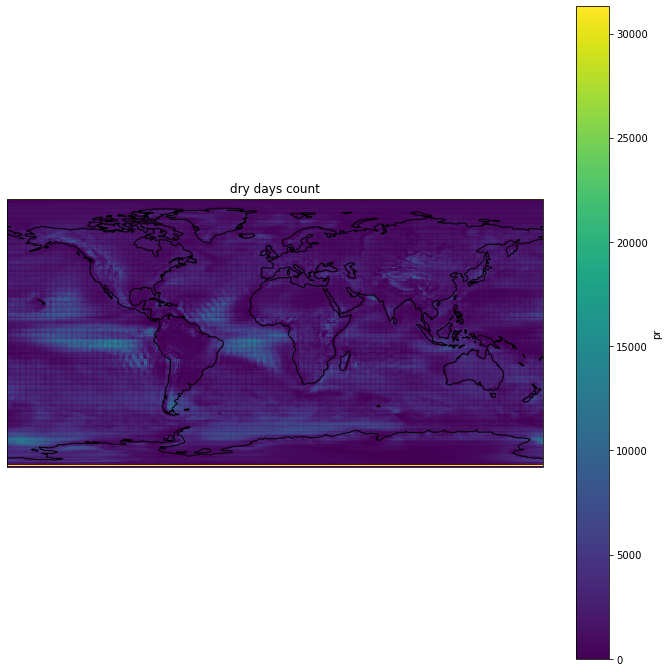

In [114]:
plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree())
garbled.where(garbled <= 1).count('time').plot.pcolormesh(ax=ax);
ax.coastlines();
plt.title(f'dry days count')

Text(0.5, 1.0, 'dry days count')

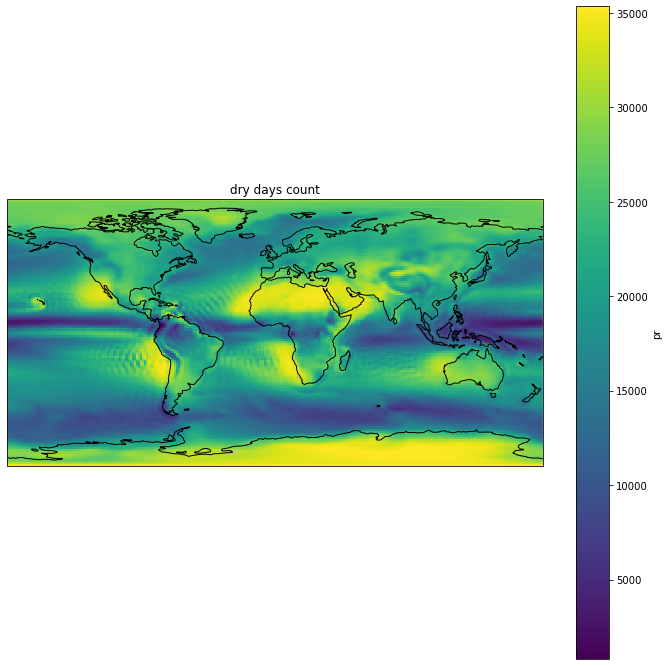

In [115]:
plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree())
garbled_clean.where(garbled_clean <= 1).count('time').plot.pcolormesh(ax=ax);
ax.coastlines();
plt.title(f'dry days count')

Text(0.5, 1.0, 'dry days count')

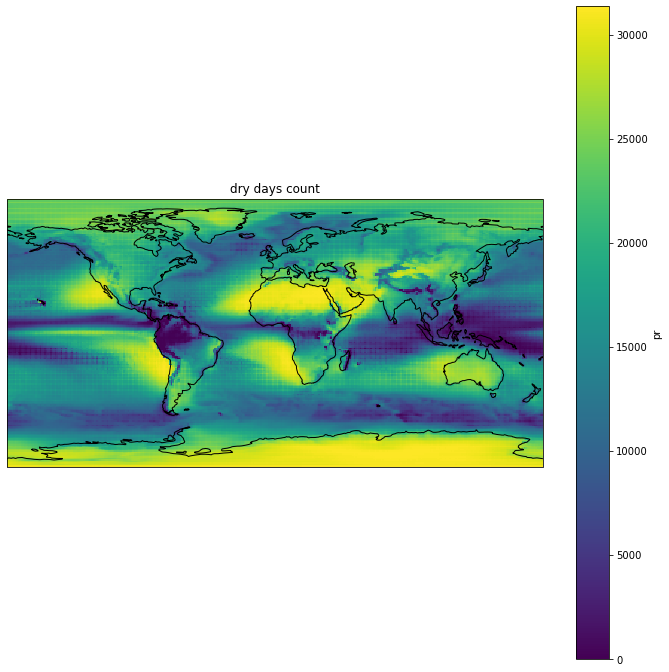

In [116]:
plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree())
garbled_bc.where(garbled_bc <= 1).count('time').plot.pcolormesh(ax=ax);
ax.coastlines();
plt.title(f'dry days count')

Text(0.5, 1.0, 'dry days count')

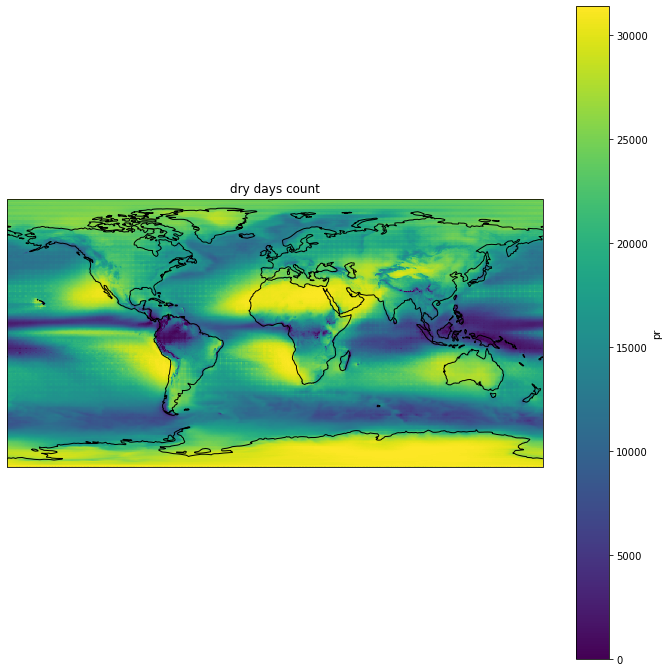

In [117]:
plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree())
new.where(new <= 1).count('time').plot.pcolormesh(ax=ax);
ax.coastlines();
plt.title(f'dry days count')

Text(0.5, 1.0, 'dry days count')

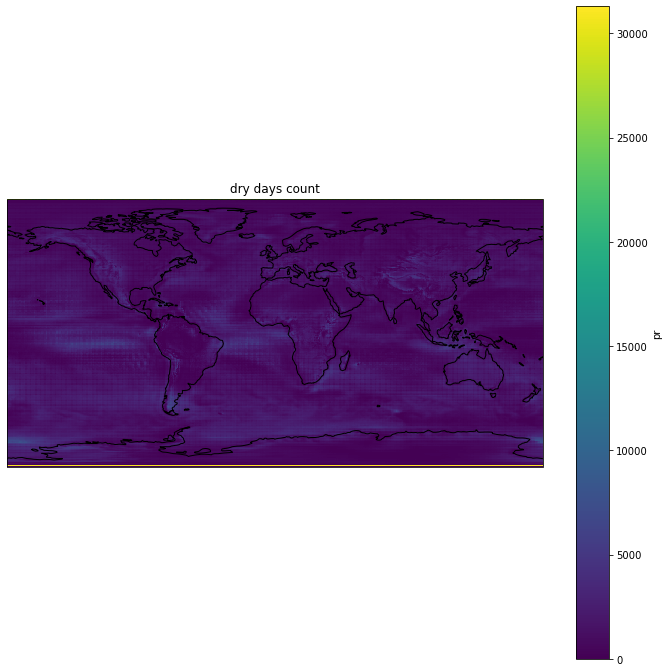

In [118]:
plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree())
old.where(old <= 1).count('time').plot.pcolormesh(ax=ax);
ax.coastlines();
plt.title(f'dry days count')

In [120]:
client.restart()
client.close()
cluster.close()

RuntimeError: IOLoop is closed

In [75]:
pr_ref = read_gcs_zarr('gs://scratch-170cd6ec/d724b589-aa9a-4018-a086-f254140a4d61/e2e-miroc6-pr-dev-42n5b-1192156886/rechunked.zarr')['pr']
bc_ssp370 = read_gcs_zarr('gs://biascorrected-492e989a/stage/ScenarioMIP/BCC/BCC-CSM2-MR/ssp370/r1i1p1f1/day/pr/gn/v20220120011220.zarr')['pr']
bc_hist = read_gcs_zarr('gs://biascorrected-492e989a/stage/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/day/pr/gn/v20220120011220.zarr')['pr']
cmip6_hist = read_gcs_zarr('gs://scratch-170cd6ec/d9d8e40f-8b68-477b-a706-ed2e2a21698e/e2e-bcc-csm2-mr-pr-dev-xkhlh-2133060164/rechunked.zarr')['pr']
cmip6_ssp370 = read_gcs_zarr('gs://scratch-170cd6ec/d9d8e40f-8b68-477b-a706-ed2e2a21698e/e2e-bcc-csm2-mr-pr-dev-xkhlh-927296851/rechunked.zarr')['pr']
cmip6_ssp370_non_preprocessed = read_gcs_zarr('gs://clean-b1dbca25/cmip6/ScenarioMIP/BCC/BCC-CSM2-MR/ssp370/r1i1p1f1/day/pr/gn/v20190318.zarr')['pr']
cmip6_ssp370_raw = read_gcs_zarr('gs://raw-305d04da/cmip6/ScenarioMIP/BCC/BCC-CSM2-MR/ssp370/r1i1p1f1/day/pr/gn/v20190318.zarr')['pr'].sel(member_id='r1i1p1f1', drop=True)*24*60*60
ds_hist = read_gcs_zarr('gs://downscaled-288ec5ac/stage/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/day/pr/gn/v20220120011220.zarr')['pr']
ds_ssp370 = read_gcs_zarr('gs://downscaled-288ec5ac/stage/ScenarioMIP/BCC/BCC-CSM2-MR/ssp370/r1i1p1f1/day/pr/gn/v20220120011220.zarr')['pr']

In [14]:
gcm = 'bcc-csm2'
ssp = 'ssp370'

In [21]:
ds_ssp370.where(ds_ssp370 <= 1).count('time').compute().quantile(q=[0.01, 0.1, 0.9, 0.99])

<xarray.DataArray 'pr' (quantile: 4)>
array([ 3236., 10323., 29013., 31192.])
Coordinates:
  * quantile  (quantile) float64 0.01 0.1 0.9 0.99

In [52]:
ds_ssp585_nesm3_dtr = read_gcs_zarr('gs://downscaled-288ec5ac/stage/ScenarioMIP/NUIST/NESM3/ssp585/r1i1p1f1/day/dtr/gn/v20211230093116.zarr')['dtr']

Text(0.5, 1.0, 'low DTR days count ssp370 downscaled bcc-csm2')

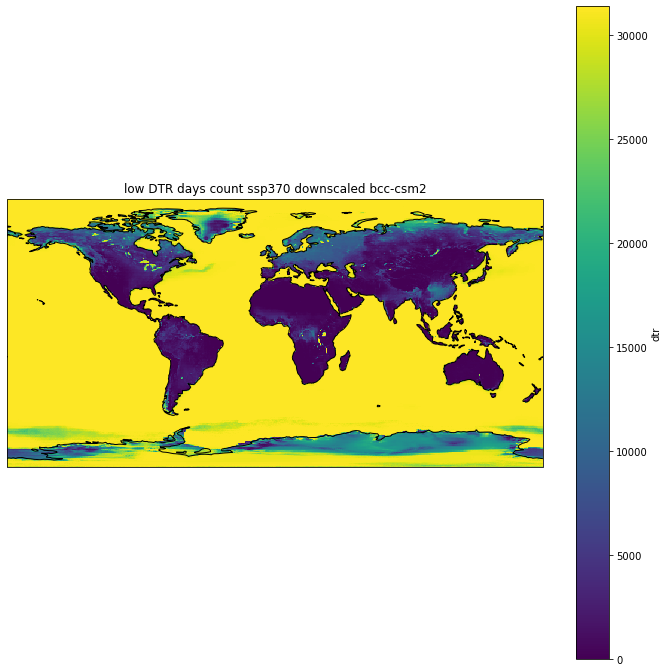

In [54]:
plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree())
ds_ssp585_nesm3_dtr.where(ds_ssp585_nesm3_dtr <= 5).count('time').plot.pcolormesh(ax=ax);
ax.coastlines();
plt.title(f'low DTR days count {ssp} downscaled {gcm}')

Text(0.5, 1.0, 'dry days count ssp370 downscaled bcc-csm2')

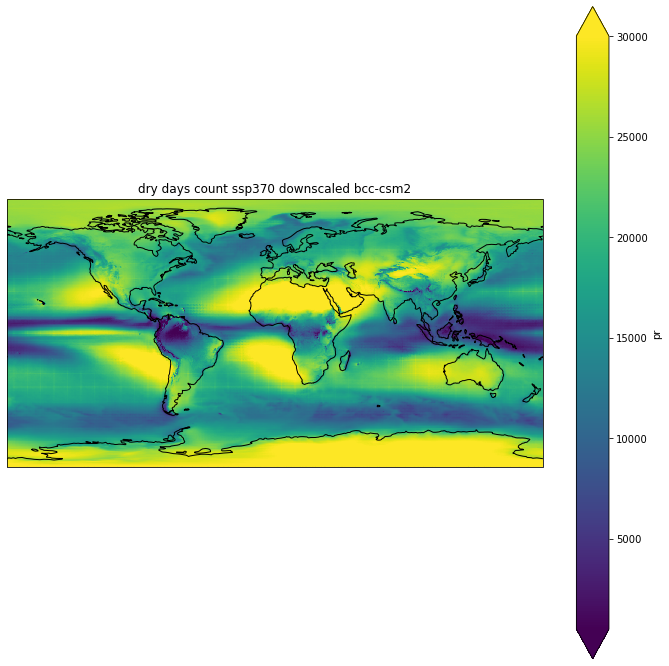

In [41]:
plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree())
ds_ssp370.where(ds_ssp370 <= 1).count('time').plot.pcolormesh(ax=ax, vmin=500, vmax=30000);
ax.coastlines();
plt.title(f'dry days count {ssp} downscaled {gcm}')

In [76]:
data_dict = {
    'ref': pr_ref,
    'raw-ssp370': cmip6_ssp370_raw, # converting units 
    'clean-ssp370-preprocessed':cmip6_ssp370,
    'clean-ssp370-non-preprocessed':cmip6_ssp370_non_preprocessed,
    'bc-ssp370': bc_ssp370,
    'ds-ssp370': ds_ssp370
}

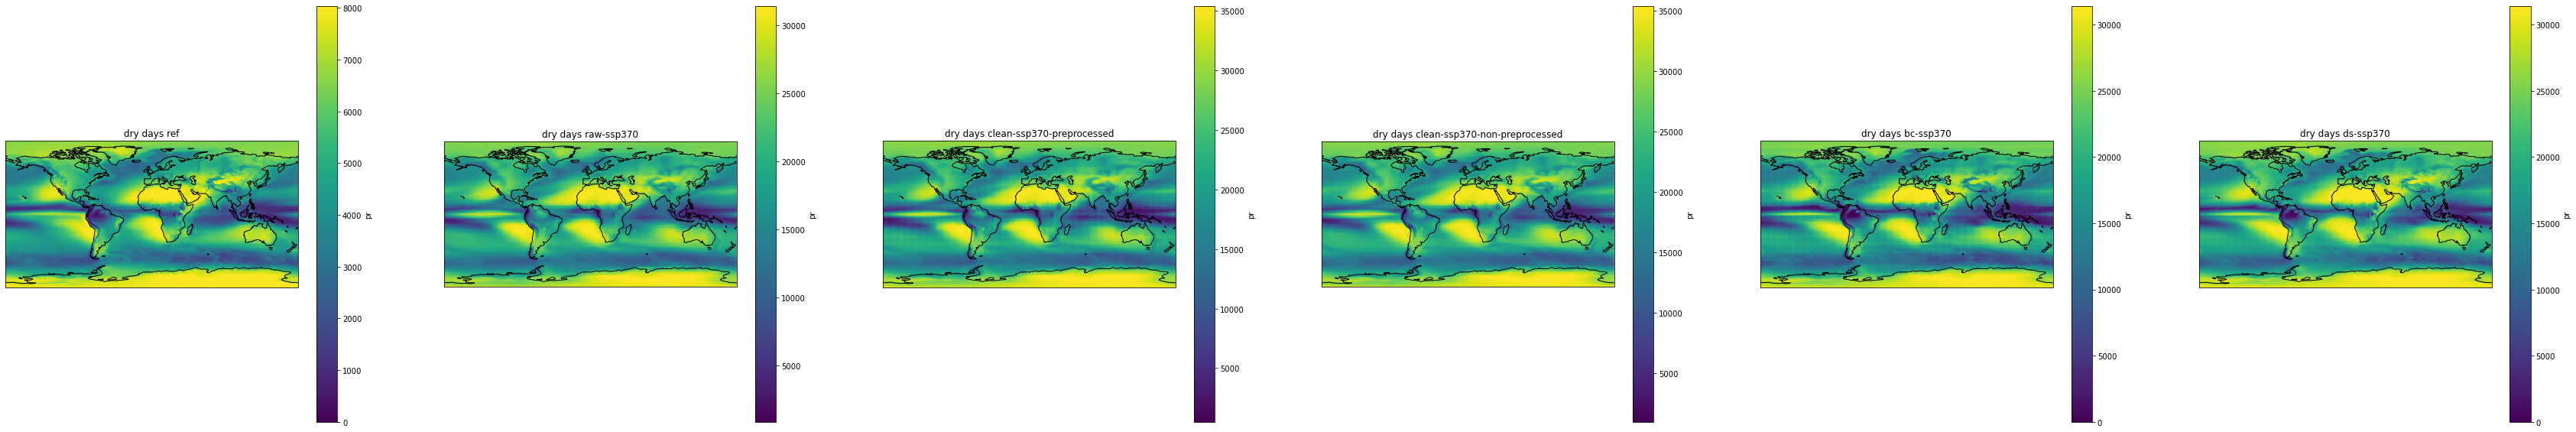

In [77]:
fig, axes = plt.subplots(1, len(data_dict), figsize=(60,10), subplot_kw={'projection': ccrs.PlateCarree()})
i = 0 
for key, da in data_dict.items():
    da.where(da <= 1).count('time').plot.pcolormesh(ax=axes[i])
    axes[i].coastlines()
    axes[i].set_title(f'dry days {key}')
    i = i + 1

In [70]:
da

<xarray.DataArray 'pr' (time: 31390, lat: 160, lon: 320)>
dask.array<getitem, shape=(31390, 160, 320), dtype=float32, chunksize=(488, 160, 320), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon      (lon) float64 0.0 1.125 2.25 3.375 4.5 ... 355.5 356.6 357.8 358.9
  * time     (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Attributes:
    cell_measures:  area: areacella
    cell_methods:   area: time: mean (interval: 5 minutes)
    comment:        includes both liquid and solid phases
    long_name:      Precipitation
    original_name:  PRECT
    standard_name:  precipitation_flux
    units:          kg m-2 s-1

Text(0.5, 1.0, 'dry days bcc-csm2 ssp370 raw')

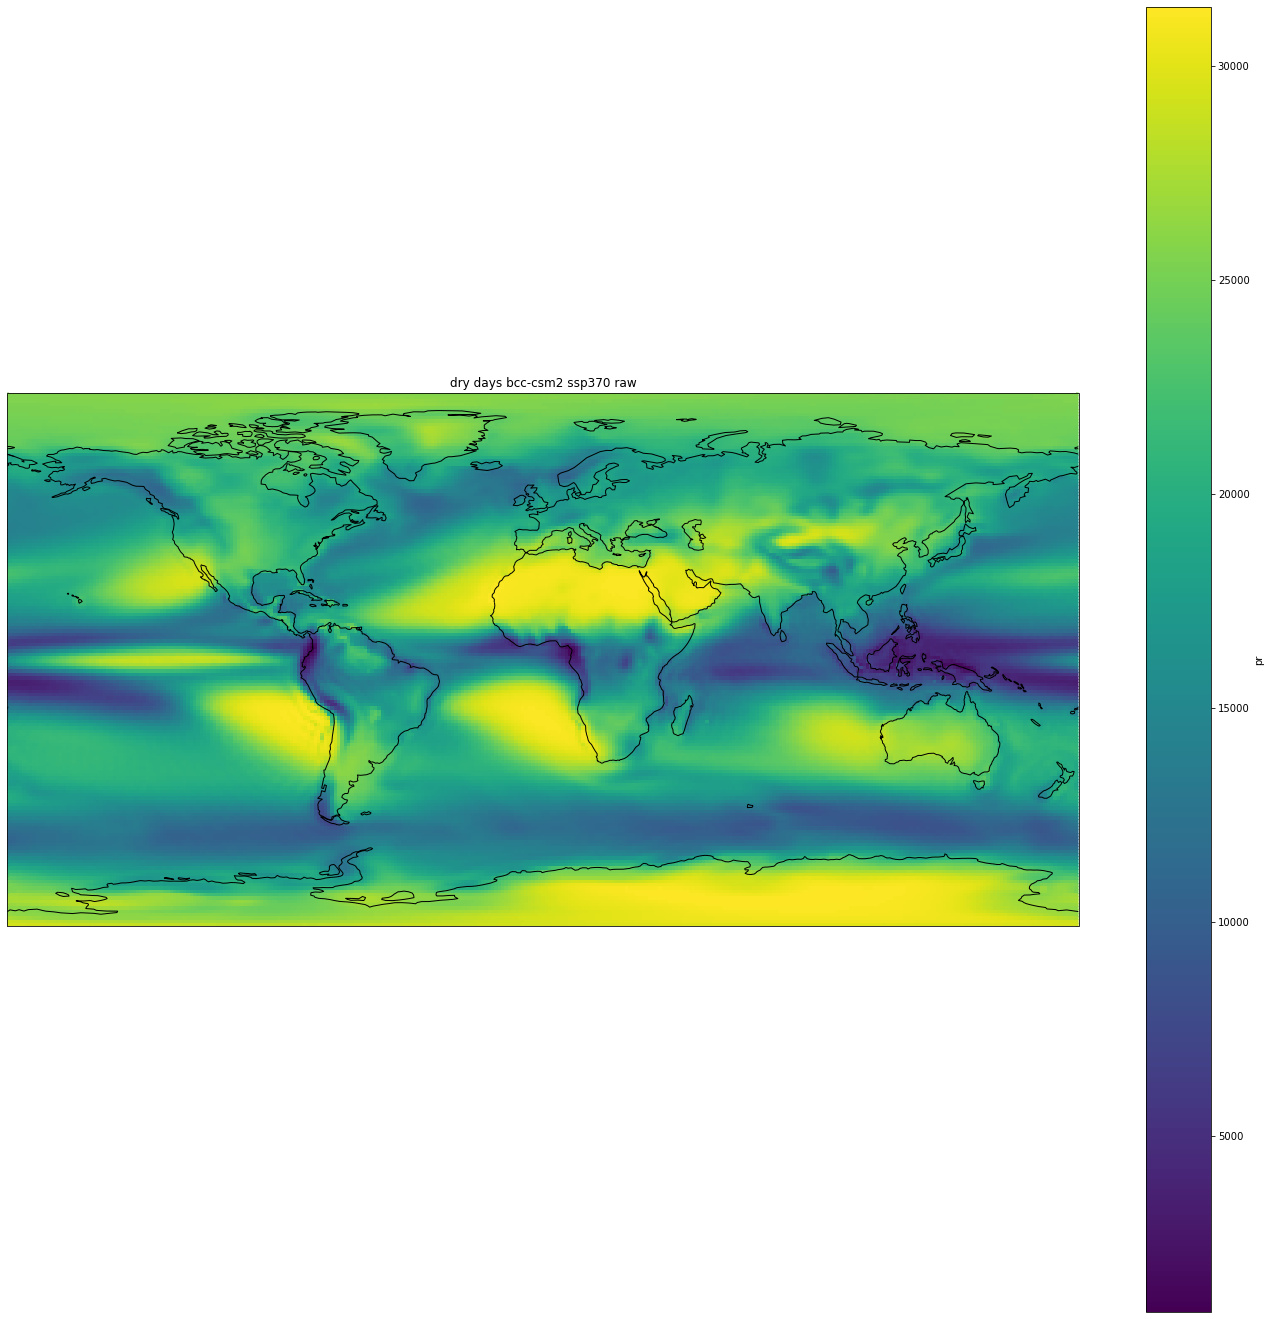

In [83]:
da = read_gcs_zarr('gs://raw-305d04da/cmip6/ScenarioMIP/BCC/BCC-CSM2-MR/ssp370/r1i1p1f1/day/pr/gn/v20190318.zarr')['pr'].sel(member_id='r1i1p1f1', drop=True)*24*60*60
plt.figure(figsize=(24,24))
ax = plt.axes(projection=ccrs.PlateCarree())
da.where(da <= 1).count('time').plot.pcolormesh(ax=ax);
ax.coastlines();
plt.title(f'dry days bcc-csm2 ssp370 raw')

Text(0.5, 1.0, 'dry days bcc-csm2 ssp370 preprocessed (rechunked, regridded, wetday)')

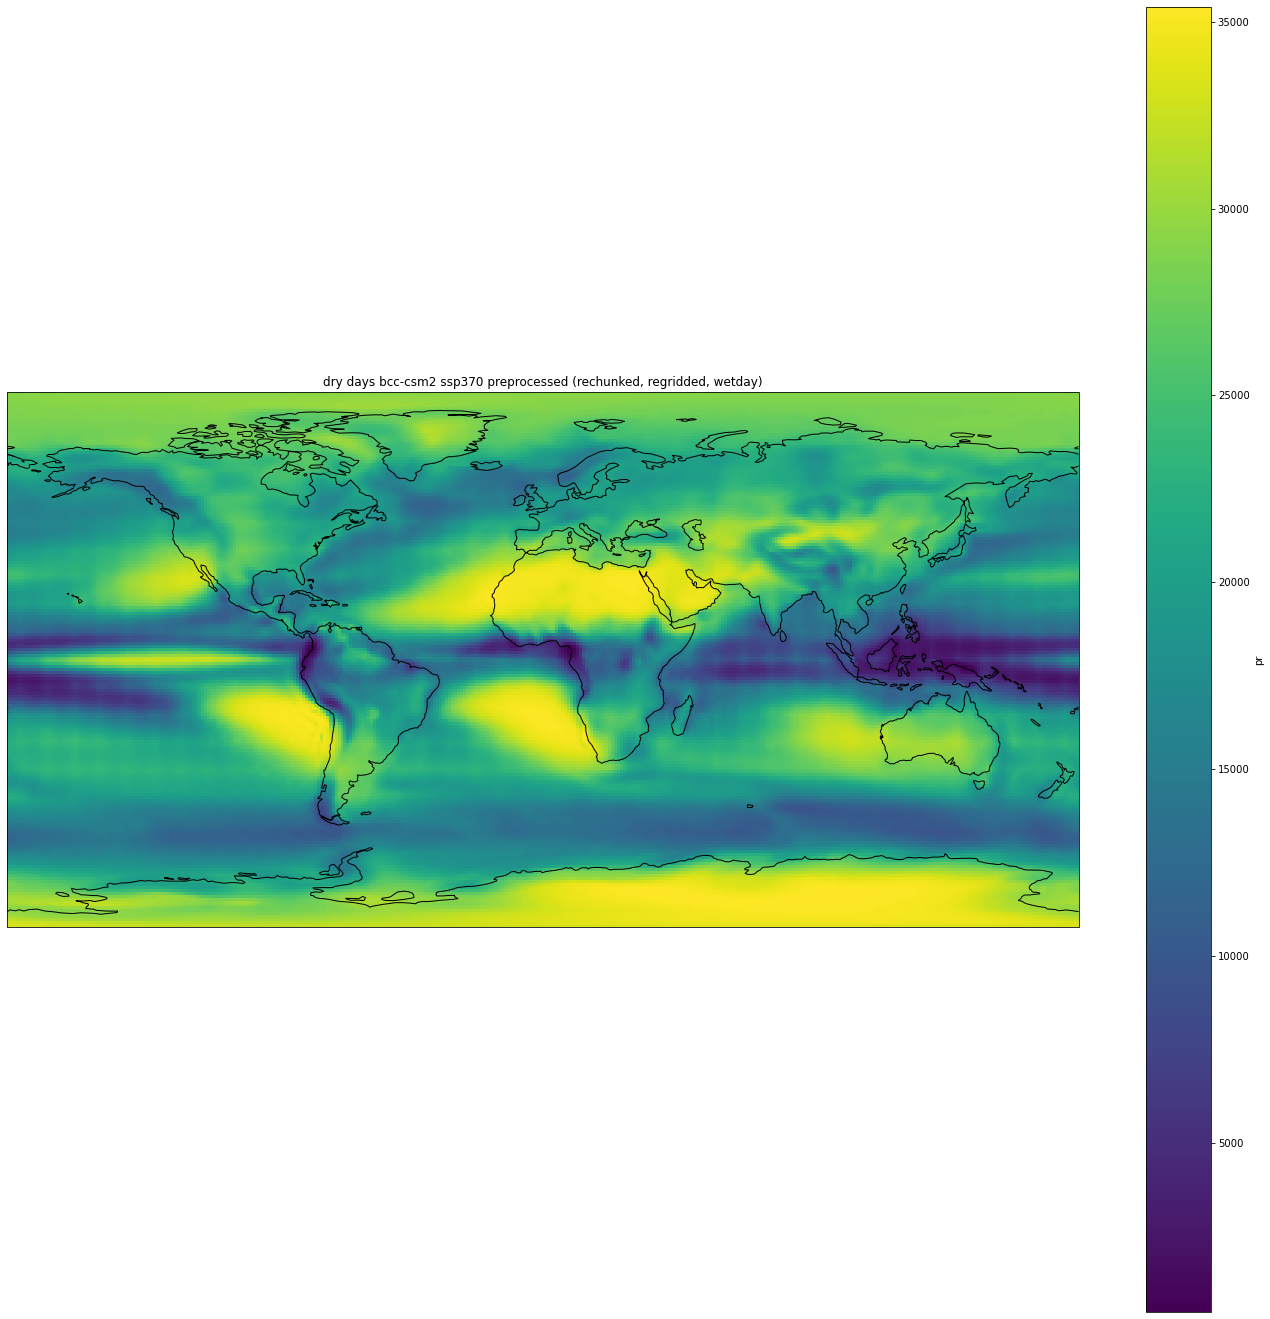

In [84]:
da = read_gcs_zarr('gs://scratch-170cd6ec/d9d8e40f-8b68-477b-a706-ed2e2a21698e/e2e-bcc-csm2-mr-pr-dev-xkhlh-927296851/rechunked.zarr')['pr']
plt.figure(figsize=(24,24))
ax = plt.axes(projection=ccrs.PlateCarree())
da.where(da <= 1).count('time').plot.pcolormesh(ax=ax);
ax.coastlines();
plt.title(f'dry days bcc-csm2 ssp370 preprocessed (rechunked, regridded, wetday)')

Text(0.5, 1.0, 'dry days bcc-csm2 ssp370 just cleaned')

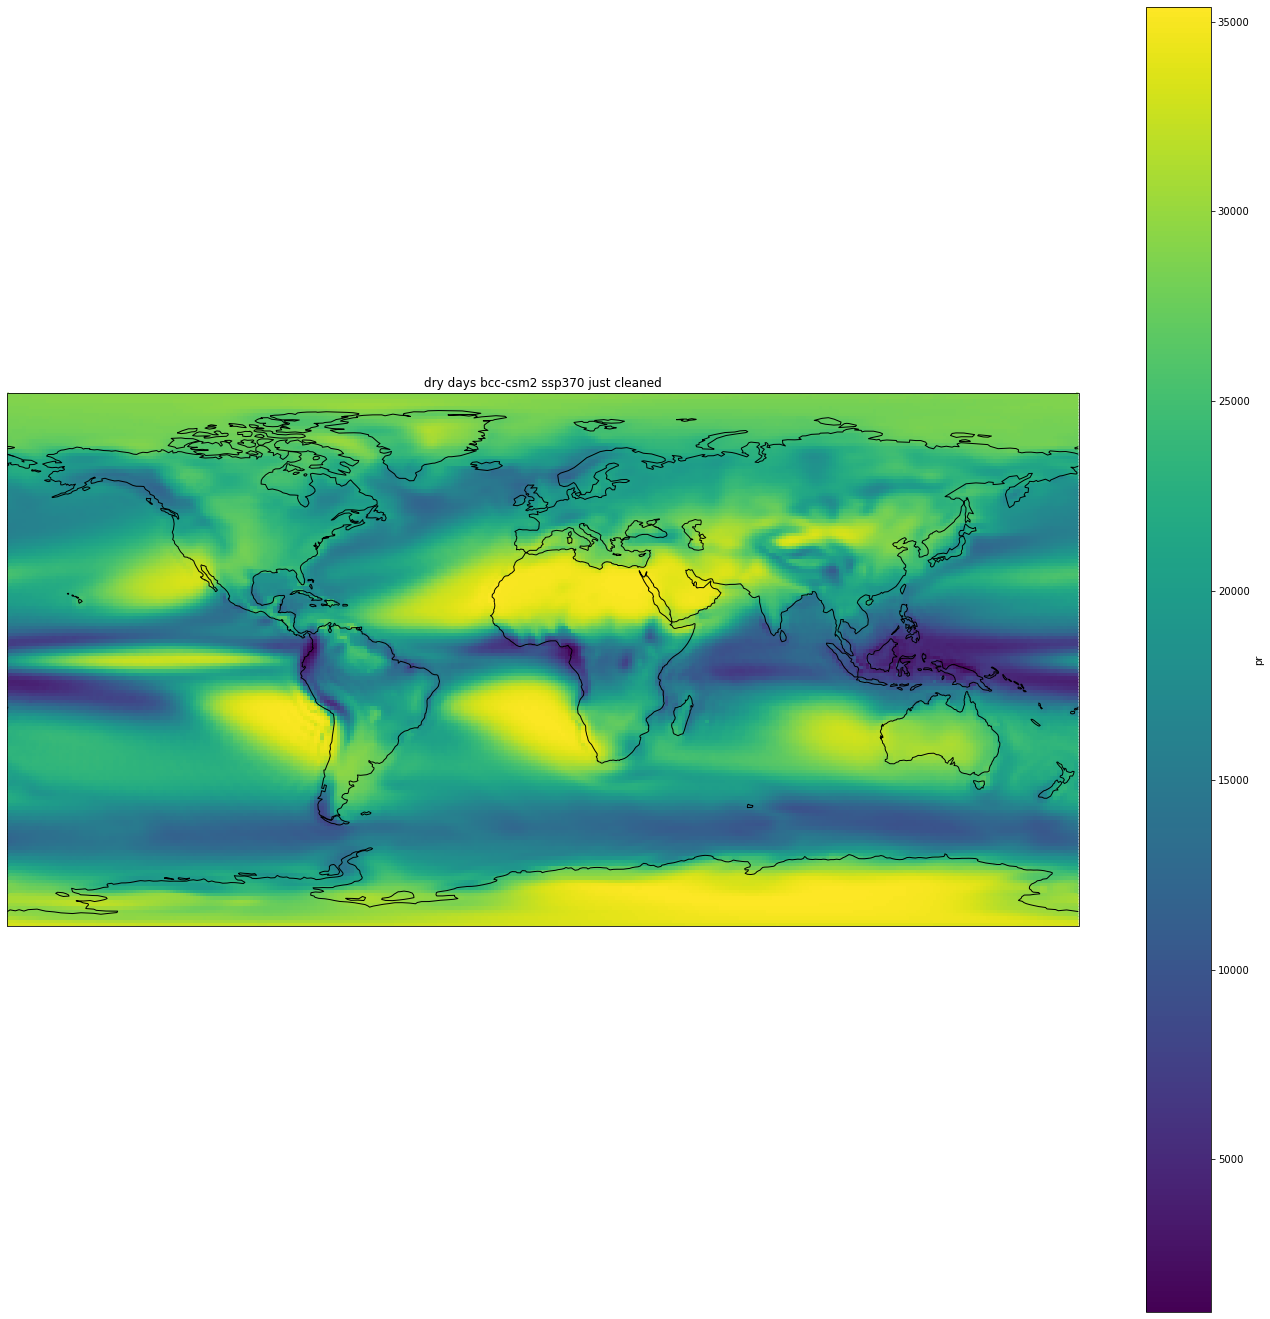

In [85]:
da = read_gcs_zarr('gs://clean-b1dbca25/cmip6/ScenarioMIP/BCC/BCC-CSM2-MR/ssp370/r1i1p1f1/day/pr/gn/v20190318.zarr')['pr']
plt.figure(figsize=(24,24))
ax = plt.axes(projection=ccrs.PlateCarree())
da.where(da <= 1).count('time').plot.pcolormesh(ax=ax);
ax.coastlines();
plt.title(f'dry days bcc-csm2 ssp370 cleaneed')

Text(0.5, 1.0, 'dry days bcc-csm2 ssp370 cleaned regridded')

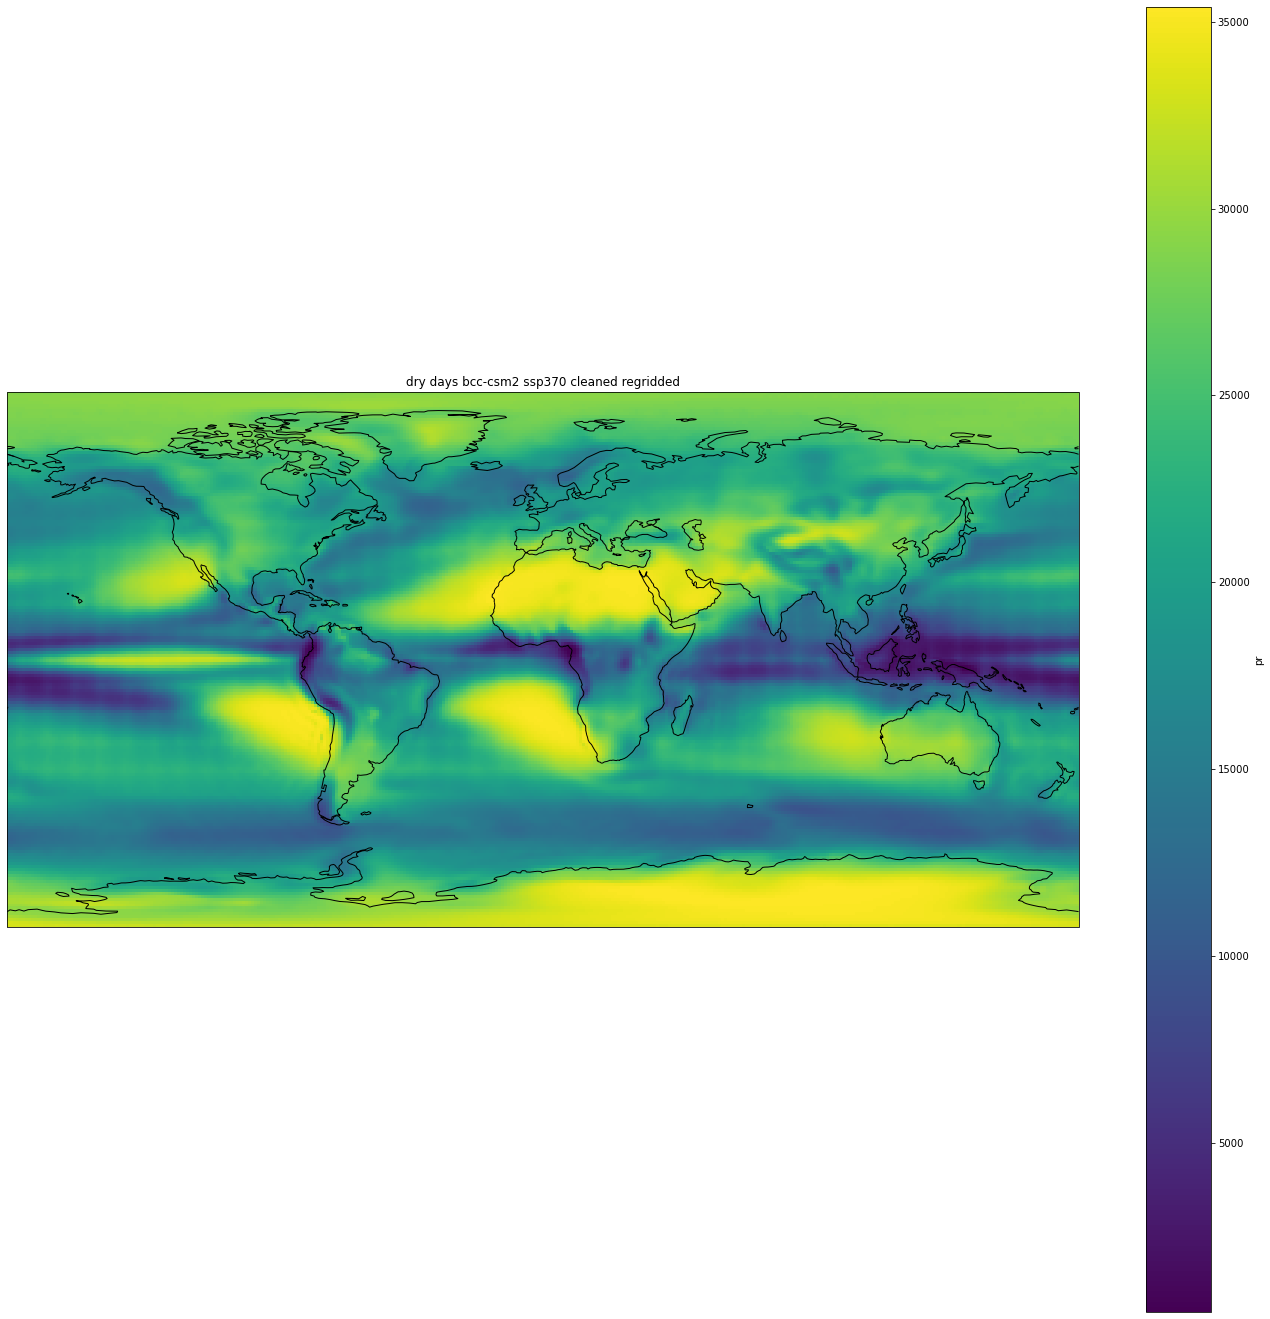

In [89]:
da = read_gcs_zarr('gs://scratch-170cd6ec/d9d8e40f-8b68-477b-a706-ed2e2a21698e/e2e-bcc-csm2-mr-pr-dev-xkhlh-1521363201/out.zarr')['pr']
plt.figure(figsize=(24,24))
ax = plt.axes(projection=ccrs.PlateCarree())
da.where(da <= 1).count('time').plot.pcolormesh(ax=ax);
ax.coastlines();
plt.title(f'dry days bcc-csm2 ssp370 cleaned regridded')

Text(0.5, 1.0, 'dry days count ssp370 downscaled access')

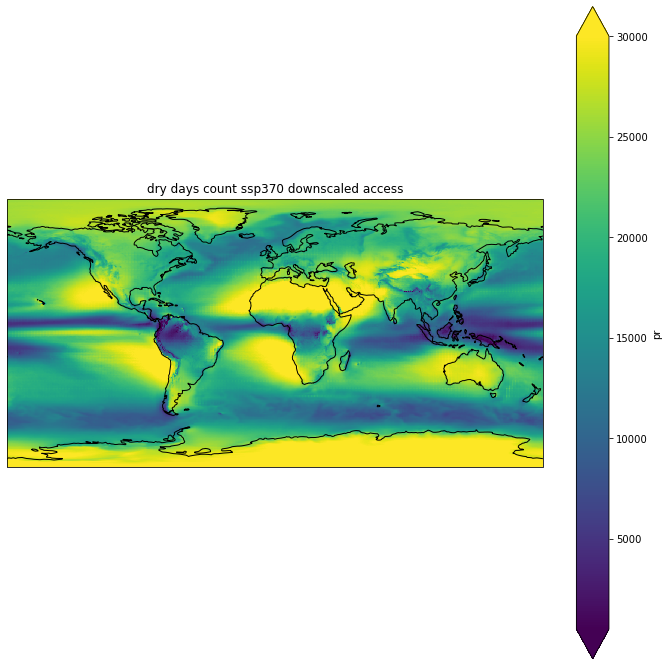

In [51]:
ds_ssp370_access = read_gcs_zarr('gs://downscaled-288ec5ac/stage/ScenarioMIP/CSIRO/ACCESS-ESM1-5/ssp370/r1i1p1f1/day/pr/gn/v20220120020016.zarr')['pr']
plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree())
ds_ssp370_access.where(ds_ssp370_access <= 1).count('time').plot.pcolormesh(ax=ax, vmin=500, vmax=30000);
ax.coastlines();
plt.title(f'dry days count {ssp} downscaled access')

Text(0.5, 1.0, 'dry days count ssp370 downscaled bcc-csm2 m1')

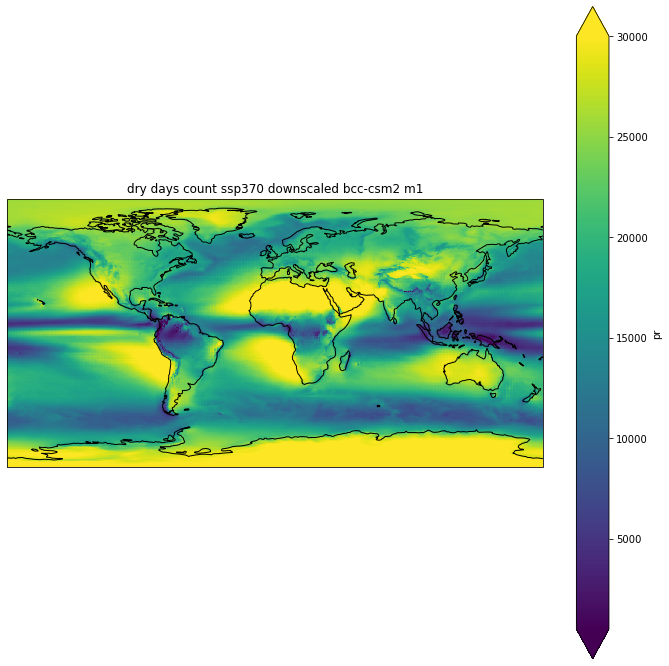

In [33]:
plt.figure(figsize=(12, 12))
ds_ssp370_m1 = read_gcs_zarr('gs://scratch-170cd6ec/7d943d5f-718e-417a-bbb2-a2c96ab7a526/e2e-access-esm1-5-pr-dev-stkmj-3567251872/qplad-adjusted.zarr')['pr']
ax = plt.axes(projection=ccrs.PlateCarree())
ds_ssp370_m1.where(ds_ssp370_m1 <= 1).count('time').plot.pcolormesh(ax=ax, vmin=500, vmax=30000);
ax.coastlines();
plt.title(f'dry days count {ssp} downscaled {gcm} m1')

/srv/conda/envs/notebook/lib/python3.8/site-packages/xarray/core/indexing.py:1233: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


Text(0.5, 1.0, 'North Atlantic dry days count ssp370 downscaled bcc-csm2 m1')

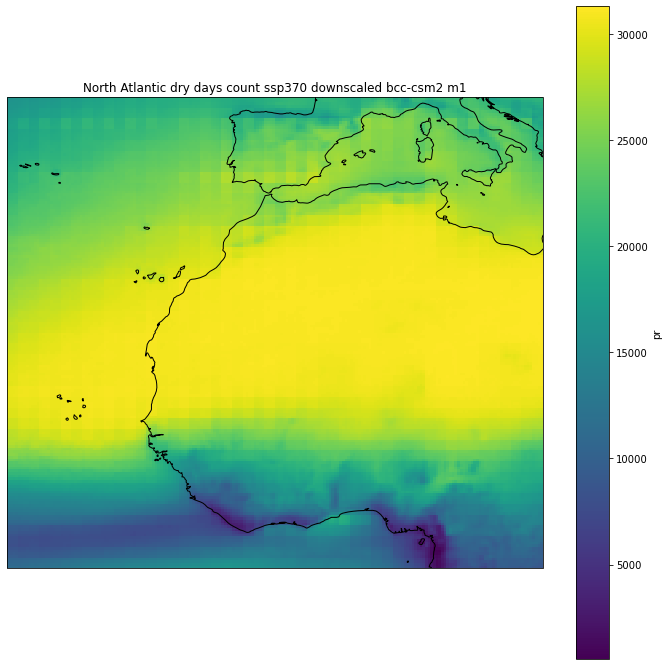

In [40]:
plt.figure(figsize=(12, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
ds_ssp370_m1.sel(lat=slice(1, 45), lon=slice(-30, 20)).where(ds_ssp370_m1 <= 1).count('time').plot.pcolormesh(ax=ax);
ax.coastlines();
plt.title(f'North Atlantic dry days count {ssp} downscaled {gcm} m1')

In [42]:
ds_ssp370_tasmin = read_gcs_zarr('gs://downscaled-288ec5ac/stage/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/day/tasmin/gn/v20220114235330.zarr')['tasmin']

Text(0.5, 1.0, 'around 0 tasmin days count ssp370 downscaled bcc-csm2')

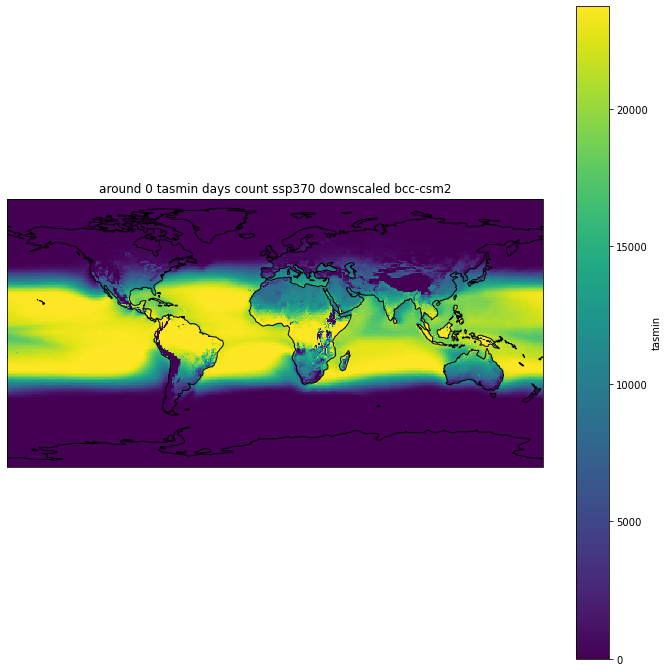

In [49]:
plt.figure(figsize=(12, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
ds_ssp370_tasmin.where((ds_ssp370_tasmin <= 300) & (ds_ssp370_tasmin >= 290)).count('time').plot.pcolormesh(ax=ax);
ax.coastlines();
plt.title(f'around 0 tasmin days count {ssp} downscaled {gcm}')